Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from collections import Counter

In [3]:
import pandas as pd

listing = pd.read_csv("https://storage.googleapis.com/public-data-337819/listings%202%20reduced.csv",low_memory=False)


You can also handle datatime column while reading the file, by just using, parse_dates = ['host_since']

In [121]:
print(listing.head().to_markdown())
print(listing.shape)
print(listing.columns)

|    |    id |   host_id | host_since   |   host_listings_count | host_identity_verified   |   calculated_host_listings_count | property_type               | room_type       | instant_bookable   |   minimum_nights |   maximum_nights |   number_of_reviews |   reviews_per_month | price   |   bedrooms |   beds | host_is_superhost   | neighbourhood_cleansed   |   review_scores_rating |   review_scores_accuracy |   review_scores_cleanliness |   review_scores_checkin |   review_scores_communication |   review_scores_location |   review_scores_value | description                                                                                                                                                                                                                                                                                                                                                                                                                                                      

##Using only the necessary columns

In [5]:
listings = listing[['id','host_id','host_since', 'host_listings_count', 'property_type','room_type', 'instant_bookable', 'minimum_nights', 'maximum_nights',
                    'number_of_reviews', 'reviews_per_month','price', 'bedrooms','beds', 'neighbourhood_cleansed', 'review_scores_rating','description',]]

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      87946 non-null  int64  
 1   host_id                 87946 non-null  int64  
 2   host_since              87941 non-null  object 
 3   host_listings_count     87941 non-null  float64
 4   property_type           87946 non-null  object 
 5   room_type               87946 non-null  object 
 6   instant_bookable        87946 non-null  object 
 7   minimum_nights          87946 non-null  int64  
 8   maximum_nights          87946 non-null  int64  
 9   number_of_reviews       87946 non-null  int64  
 10  reviews_per_month       65788 non-null  float64
 11  price                   87946 non-null  object 
 12  bedrooms                55172 non-null  float64
 13  beds                    86812 non-null  float64
 14  neighbourhood_cleansed  87946 non-null

Dealing with duplicates

In [7]:
listings.duplicated().sum()

0

No duplicates found!

Dealing with datetime column

In [8]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      87946 non-null  int64         
 1   host_id                 87946 non-null  int64         
 2   host_since              87941 non-null  datetime64[ns]
 3   host_listings_count     87941 non-null  float64       
 4   property_type           87946 non-null  object        
 5   room_type               87946 non-null  object        
 6   instant_bookable        87946 non-null  object        
 7   minimum_nights          87946 non-null  int64         
 8   maximum_nights          87946 non-null  int64         
 9   number_of_reviews       87946 non-null  int64         
 10  reviews_per_month       65788 non-null  float64       
 11  price                   87946 non-null  object        
 12  bedrooms                55172 non-null  float6

<ipython-input-8-cc8cd26e458a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['host_since'] = pd.to_datetime(listings['host_since'])


Dealing with price column

In [9]:
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-9-7e8ca8061522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [10]:
print(listings.head().to_markdown())
listings.dtypes

|    |    id |   host_id | host_since          |   host_listings_count | property_type               | room_type       | instant_bookable   |   minimum_nights |   maximum_nights |   number_of_reviews |   reviews_per_month |   price |   bedrooms |   beds | neighbourhood_cleansed   |   review_scores_rating | description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

id                                 int64
host_id                            int64
host_since                datetime64[ns]
host_listings_count              float64
property_type                     object
room_type                         object
instant_bookable                  object
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
reviews_per_month                float64
price                            float64
bedrooms                         float64
beds                             float64
neighbourhood_cleansed            object
review_scores_rating             float64
description                       object
dtype: object

Checking for null values

In [11]:
(listings.isna().sum() / len(listings))*100

id                         0.000000
host_id                    0.000000
host_since                 0.005685
host_listings_count        0.005685
property_type              0.000000
room_type                  0.000000
instant_bookable           0.000000
minimum_nights             0.000000
maximum_nights             0.000000
number_of_reviews          0.000000
reviews_per_month         25.195006
price                      0.000000
bedrooms                  37.266050
beds                       1.289428
neighbourhood_cleansed     0.000000
review_scores_rating      25.195006
description                1.440657
dtype: float64

We see that noticeable missing values are in reviews_per_month, bedrooms, and the review_scores_rating.

Let's focus on the reviews_per_month for now

In [12]:
listings['reviews_per_month'].isna().sum()

22158

In [13]:
listings_zero_reviews = listings[(listings['number_of_reviews'] == 0)]
print(listings_zero_reviews.shape)

(22158, 17)


I found out that all the value of reviews_per_month are nan if the number of reviews on that listing are 0. It makes perfect sense. So we will just replace the null values by 0.

In [14]:
listings['reviews_per_month'].fillna(0, inplace = True)

<ipython-input-14-fac233795ac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['reviews_per_month'].fillna(0, inplace = True)


Now, let's focus on rest of the columns.

In [15]:
columns_to_drop_na = ['host_since', 'host_listings_count', 'bedrooms', 'beds', 'review_scores_rating', 'description']
listings.dropna(subset = columns_to_drop_na, inplace = True)

<ipython-input-15-d291928b5db9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings.dropna(subset = columns_to_drop_na, inplace = True)


In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40898 entries, 1 to 87733
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      40898 non-null  int64         
 1   host_id                 40898 non-null  int64         
 2   host_since              40898 non-null  datetime64[ns]
 3   host_listings_count     40898 non-null  float64       
 4   property_type           40898 non-null  object        
 5   room_type               40898 non-null  object        
 6   instant_bookable        40898 non-null  object        
 7   minimum_nights          40898 non-null  int64         
 8   maximum_nights          40898 non-null  int64         
 9   number_of_reviews       40898 non-null  int64         
 10  reviews_per_month       40898 non-null  float64       
 11  price                   40898 non-null  float64       
 12  bedrooms                40898 non-null  float64    

Let's begin the statistical analysis!

In [17]:
print(listings.describe().to_markdown())

|       |              id |         host_id | host_since                    |   host_listings_count |   minimum_nights |   maximum_nights |   number_of_reviews |   reviews_per_month |     price |    bedrooms |        beds |   review_scores_rating |
|:------|----------------:|----------------:|:------------------------------|----------------------:|-----------------:|-----------------:|--------------------:|--------------------:|----------:|------------:|------------:|-----------------------:|
| count | 40898           | 40898           | 40898                         |            40898      |      40898       |        40898     |          40898      |        40898        | 40898     | 40898       | 40898       |           40898        |
| mean  |     3.46475e+17 |     1.52179e+08 | 2016-12-19 06:00:26.407159296 |               29.9549 |          5.35567 |          552.425 |             19.1618 |            0.974018 |   209.286 |     1.76811 |     2.16803 |               4.61099  |
| mi

Now, let's check for outliers

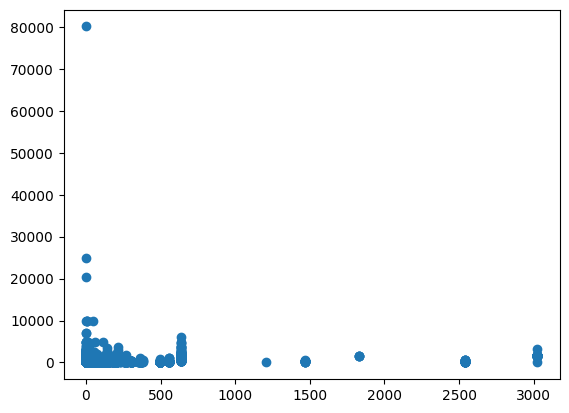

In [17]:
plt.scatter(x = 'host_listings_count', y = 'price', data = listings)

In [18]:
listings.query("host_listings_count < 1500 and price > 70000")
#drop id 38452677

id    host_id host_since  host_listings_count      property_type  \
36165  38452677  289928037 2019-08-28                  1.0  Entire guesthouse   

             room_type instant_bookable  minimum_nights  maximum_nights  \
36165  Entire home/apt                t               2            1125   

       number_of_reviews  reviews_per_month    price  bedrooms  beds  \
36165                 11               0.23  80100.0       1.0   1.0   

      neighbourhood_cleansed  review_scores_rating  \
36165   Barking and Dagenham                   5.0   

                                             description  
36165  Bouquet design open plan house. <br />Beautifu...

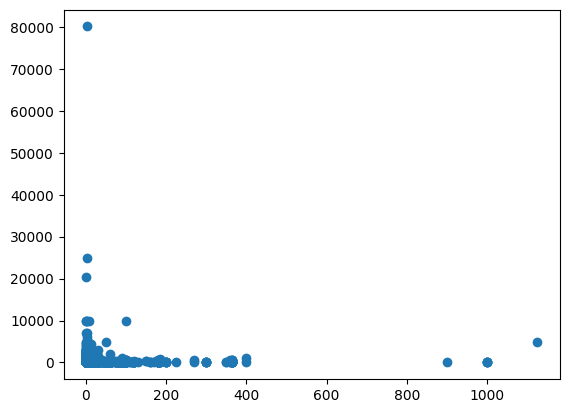

In [19]:
plt.scatter(x = 'minimum_nights', y = 'price', data = listings)

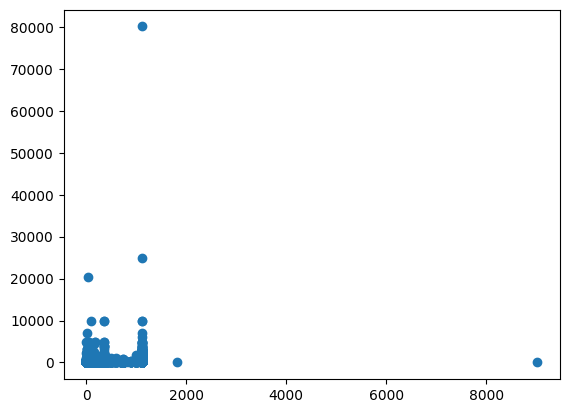

In [20]:
plt.scatter(x = 'maximum_nights', y = 'price', data = listings)

In [21]:
listings.query("minimum_nights > 400 and minimum_nights < 800")
#drop id 13254774, 38452677, 7878442

Empty DataFrame
Columns: [id, host_id, host_since, host_listings_count, property_type, room_type, instant_bookable, minimum_nights, maximum_nights, number_of_reviews, reviews_per_month, price, bedrooms, beds, neighbourhood_cleansed, review_scores_rating, description]
Index: []

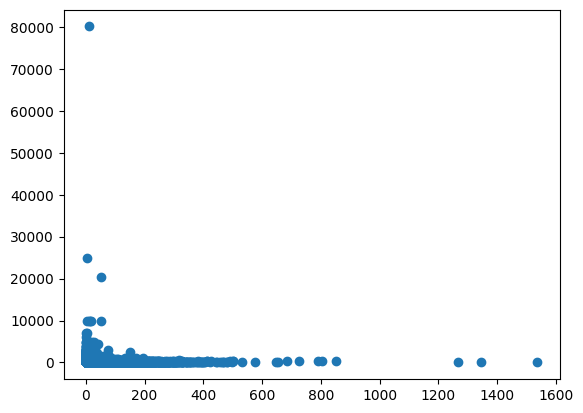

In [22]:
plt.scatter(x = 'number_of_reviews', y = 'price', data = listings)

In [23]:
listings.query("number_of_reviews > 1200 ")
#drop id 13254774, 38452677, 7878442, 19670926, 30760930, 43120947, 47408549

id    host_id host_since  host_listings_count  \
29831  30760930  217727211 2018-09-28                 23.0   
40367  43120947   87449409 2016-08-02                  2.0   
42982  47408549  382416289 2020-12-31                  6.0   

                property_type     room_type instant_bookable  minimum_nights  \
29831  Room in boutique hotel  Private room                t               1   
40367           Room in hotel  Private room                t               1   
42982           Room in hotel  Private room                t               1   

       maximum_nights  number_of_reviews  reviews_per_month  price  bedrooms  \
29831            1125               1536              27.38  198.0       1.0   
40367            1125               1267              32.80  110.0       1.0   
42982            1125               1345              50.25  224.0       1.0   

       beds neighbourhood_cleansed  review_scores_rating  \
29831   1.0            Westminster                  4.54   
40367   1.0                Hackney                  4.51   
42982   1.0                 Camden                  4.46   

                                             description  
29831  Our finest product, the Double rooms with Gard...  
40367  <b>The space</b><br />Double Room<br />Ensuite...  
42982  The Melville Hotel is a hotel located in the h...

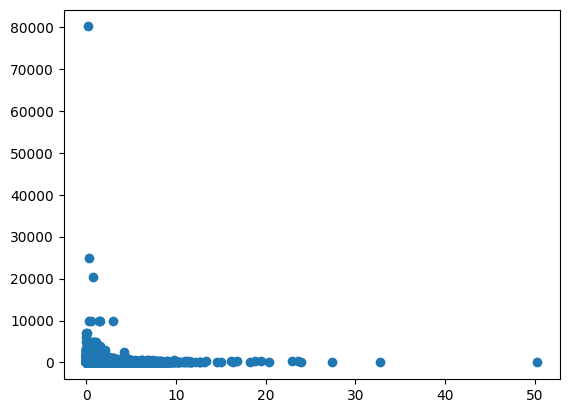

In [24]:
plt.scatter(x = 'reviews_per_month', y = 'price', data = listings)

In [25]:
listings.query("reviews_per_month > 40 ")
#drop id 13254774, 38452677, 7878442, 19670926, 30760930, 43120947, 47408549, 879651617475418286

id    host_id host_since  host_listings_count  property_type  \
42982  47408549  382416289 2020-12-31                  6.0  Room in hotel   

          room_type instant_bookable  minimum_nights  maximum_nights  \
42982  Private room                t               1            1125   

       number_of_reviews  reviews_per_month  price  bedrooms  beds  \
42982               1345              50.25  224.0       1.0   1.0   

      neighbourhood_cleansed  review_scores_rating  \
42982                 Camden                  4.46   

                                             description  
42982  The Melville Hotel is a hotel located in the h...

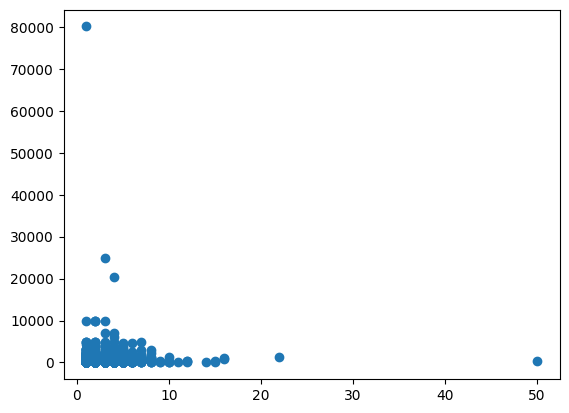

In [26]:
plt.scatter(x = 'bedrooms', y = 'price', data = listings)

In [27]:
listings.query("bedrooms > 30")
#drop id 13254774, 38452677, 7878442, 19670926, 30760930, 43120947, 47408549, 879651617475418286, 53296983, 703059085057877556, 703078198140532847,
#705872112605581885, 746394903447641656, 746408203567912175

id    host_id host_since  host_listings_count  property_type  \
47935  53296983  117051575 2017-02-19                 18.0  Room in hotel   

          room_type instant_bookable  minimum_nights  maximum_nights  \
47935  Private room                f               1             365   

       number_of_reviews  reviews_per_month  price  bedrooms  beds  \
47935                  1                0.1  260.0      50.0  50.0   

      neighbourhood_cleansed  review_scores_rating  \
47935                 Camden                   3.0   

                                             description  
47935  Looking for a relaxing weekend, scheduling a m...

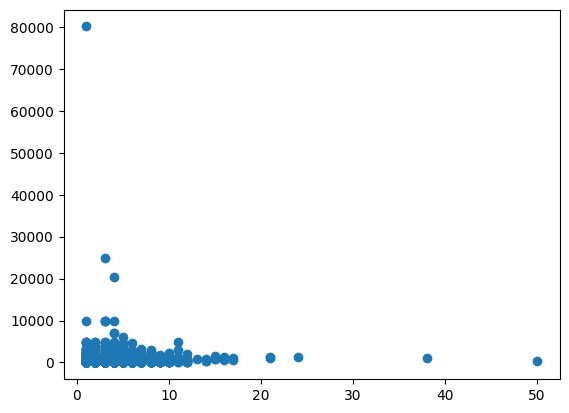

In [28]:
plt.scatter(x = 'beds', y = 'price', data = listings)

In [29]:
listings.query("beds > 30")
#drop id 13254774, 38452677, 7878442, 19670926, 30760930, 43120947, 47408549, 879651617475418286, 53296983, 703059085057877556, 703078198140532847,
#705872112605581885, 746394903447641656, 746408203567912175, 39840632

id    host_id host_since  host_listings_count  \
37400  39840632  162523434 2017-12-13                 23.0   
47935  53296983  117051575 2017-02-19                 18.0   

                   property_type        room_type instant_bookable  \
37400  Entire serviced apartment  Entire home/apt                f   
47935              Room in hotel     Private room                f   

       minimum_nights  maximum_nights  number_of_reviews  reviews_per_month  \
37400               5            1125                  1               0.05   
47935               1             365                  1               0.10   

       price  bedrooms  beds neighbourhood_cleansed  review_scores_rating  \
37400  988.0      16.0  38.0                 Ealing                   5.0   
47935  260.0      50.0  50.0                 Camden                   3.0   

                                             description  
37400  This listing is for booking multiple propertie...  
47935  Looking for a relaxing weekend, scheduling a m...

These are all the outliers we found, let's remove them.

In [30]:
outliers = [13254774, 38452677, 7878442, 19670926, 30760930, 43120947, 47408549, 879651617475418286, 53296983, 703059085057877556, 703078198140532847,
            705872112605581885, 746394903447641656, 746408203567912175, 39840632]
listings = listings[listings.id.isin(outliers) == False]
listings.shape

(40892, 17)

Now, let's begin our Exploratory Data Analysis

In [31]:
top_property_type = listings['property_type'].value_counts()

In [32]:
top_property_type.shape

(64,)

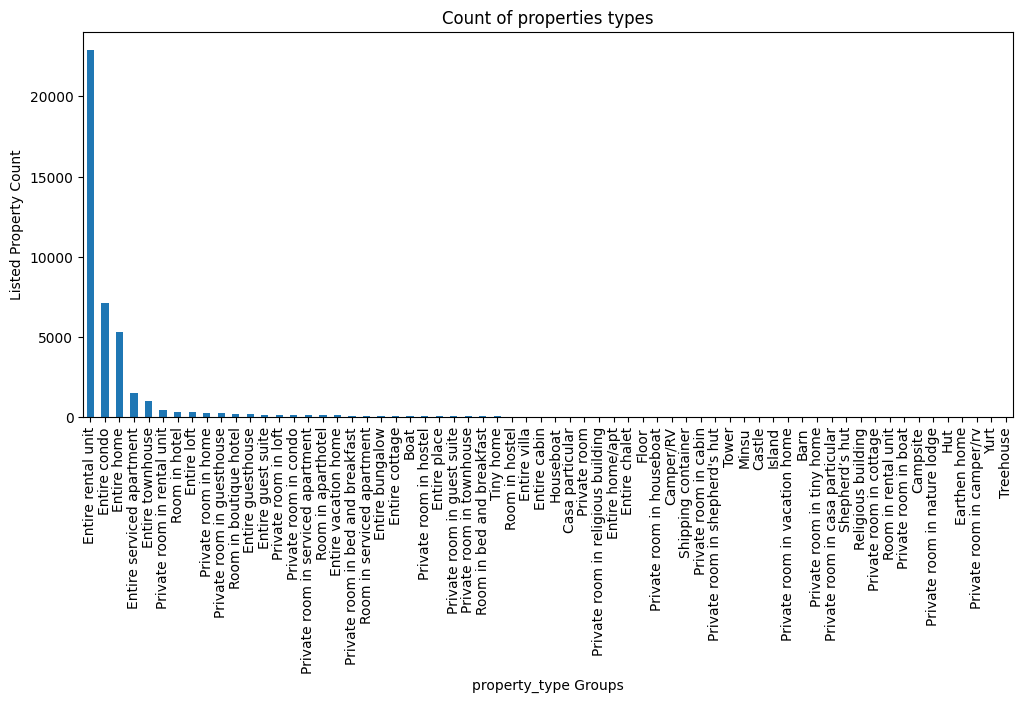

In [33]:
plt.figure(figsize=(12,5))
top_property_type.plot.bar()
plt.xlabel('property_type Groups')
plt.ylabel('Listed Property Count')
plt.title('Count of properties types')
plt.show()

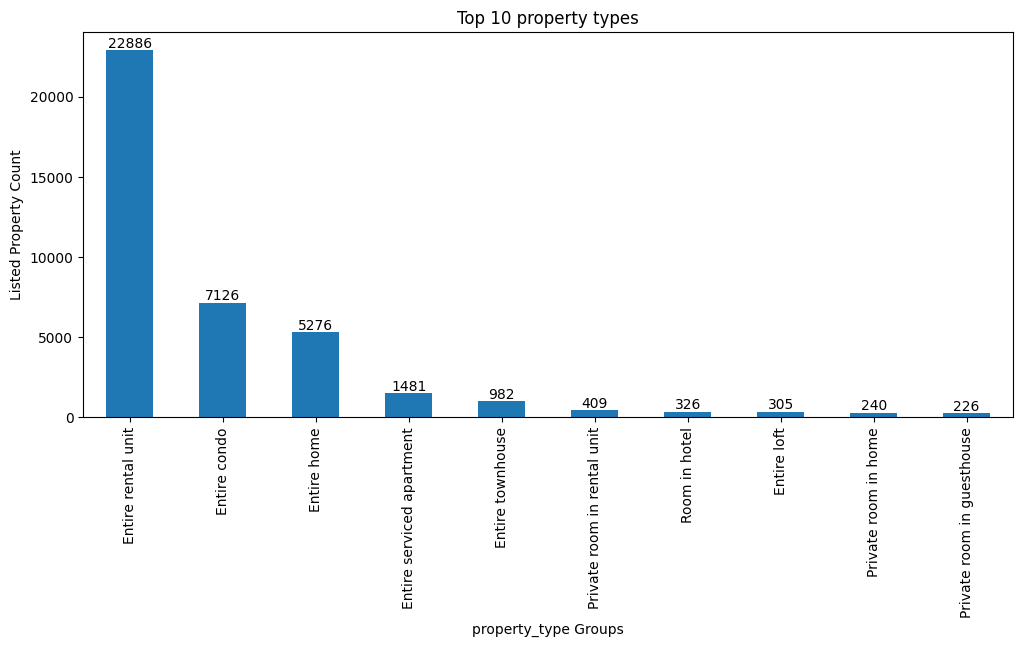

In [34]:
top_10_property_type = listings['property_type'].value_counts().head(10)
plt.figure(figsize=(12,5))
top_10_property_type.plot.bar()
plt.xlabel('property_type Groups')
plt.ylabel('Listed Property Count')
plt.title('Top 10 property types')
for i, v in enumerate(top_10_property_type):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

Entire rental unit has the most number of listings with 22886.

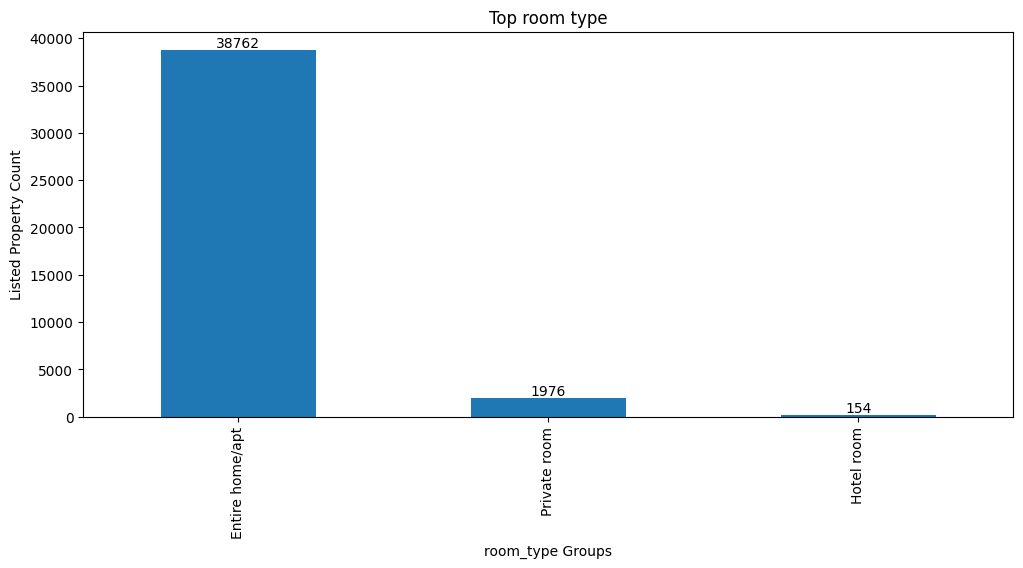

In [35]:
top_room_type = listings['room_type'].value_counts()
plt.figure(figsize=(12,5))
top_room_type.plot.bar()
plt.xlabel('room_type Groups')
plt.ylabel('Listed Property Count')
plt.title('Top room type')
for i, v in enumerate(top_room_type):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

There are 4 room type provided by the hosts. Most of the rooms provided are private rooms and Entire home or apartments type.

Share rooms are listed very few, as it make sense that people travelling with family will prefer the top 2 room types rather than sharing.

# **Can you spot any major differences in the Airbnb market between neighborhoods?**

neighbourhood_cleansed
Westminster               5389
Kensington and Chelsea    3310
Camden                    3096
Hackney                   3027
Tower Hamlets             2998
Islington                 2383
Southwark                 2306
Lambeth                   2189
Wandsworth                2090
Hammersmith and Fulham    1950
Lewisham                  1095
Brent                     1079
Haringey                   968
Barnet                     886
Ealing                     878
Newham                     829
Greenwich                  787
Waltham Forest             733
Richmond upon Thames       627
Merton                     579
Hounslow                   551
Croydon                    513
City of London             332
Bromley                    327
Hillingdon                 300
Kingston upon Thames       292
Enfield                    275
Redbridge                  267
Barking and Dagenham       192
Harrow                     185
Havering                   157
Bexley          

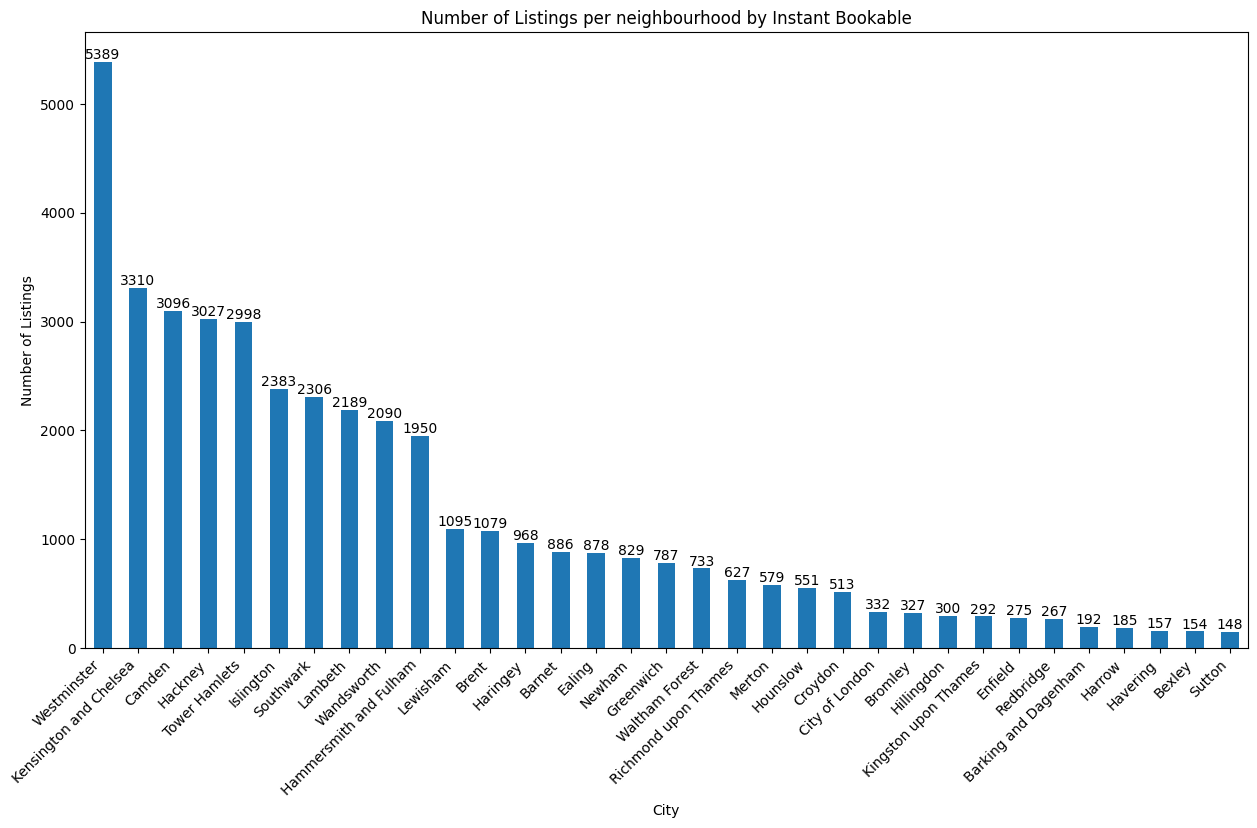

In [36]:
#grouping the cities by instant bookable and sorting
neighbourhood_instantbookable = listings.groupby('neighbourhood_cleansed')['instant_bookable'].count().sort_values(ascending = False)
print(neighbourhood_instantbookable)

#plot the graph to see differences between cities by instant bookable
plt.figure(figsize = (15,8))
neighbourhood_instantbookable.plot.bar()
plt.title('Number of Listings per neighbourhood by Instant Bookable')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation = 45, ha = 'right')
for i, v in enumerate(neighbourhood_instantbookable):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

Westminster has the highest number of instant bookings with a total of 5389 bookings and Sutton has the least number of instant bookings with 148.



In [39]:
# Grouping neighbourhood by number of listings and then cleaning them

neighborhood_dF=listings.groupby('neighbourhood_cleansed')['id'].count()
neighborhood_dF=neighborhood_dF.reset_index()
neighborhood_dF=neighborhood_dF.rename(columns={'id':'Number_Of_Listings'})
neighborhood_dF=neighborhood_dF.sort_values('Number_Of_Listings',ascending= False)

In [40]:
# Grouping neighbourhood by average price of listings and cleaning them

neighborhoodPrice_dF=listings.groupby('neighbourhood_cleansed')['price'].median()
neighborhoodPrice_dF=neighborhoodPrice_dF.reset_index()
neighborhoodPrice_dF=neighborhoodPrice_dF.rename(columns={'price':'Median_Price'})
neighborhoodPrice_dF=neighborhoodPrice_dF.sort_values('Median_Price',ascending=False)


In [41]:

# Merging the two dataframes

mergeDF=pd.merge(neighborhood_dF,neighborhoodPrice_dF,on='neighbourhood_cleansed')
mergeDF.head()

neighbourhood_cleansed  Number_Of_Listings  Median_Price
0             Westminster                5389         220.0
1  Kensington and Chelsea                3310         214.0
2                  Camden                3096         176.5
3                 Hackney                3027         134.0
4           Tower Hamlets                2998         144.0

Text(0, 0.5, 'Median Price')

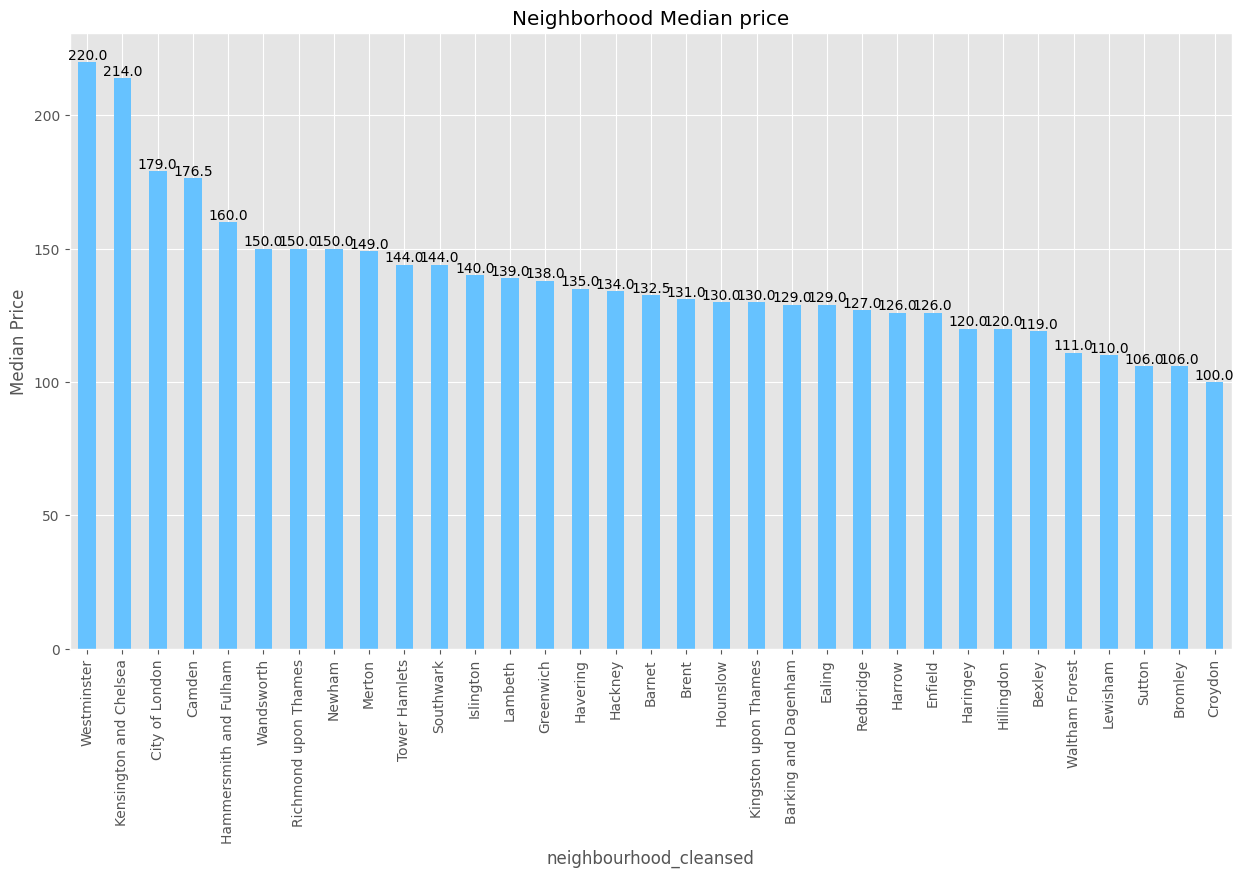

In [43]:
plt.style.use('ggplot')

#objects = neighborhoodPrice_dF['neighbourhood_cleansed']
y_pos = neighborhoodPrice_dF['Median_Price']

neighborhoodPrice_dF.plot(kind='bar',
           x='neighbourhood_cleansed',
           y='Median_Price',
           color = '#66c2ff',
           figsize =(15,8),
           title = 'Neighborhood Median price',
           legend = False)
for i, v in enumerate(y_pos):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('Median Price')

By analyzing the number of listings and prices for each neighborhood, we can get a clearer understanding of which neighbourhoods have a lot of expensive listings. Looking at the analysis done so far, we can see that "westminster" and "Kensington and Chelsea" are indeed more 'expensive' than others. However, some of those neighbourhoods do not have as many listings as other expensive neighbourhoods like "City of London". Since our problem was to identify factors that make a listing more expensive, we can infer that these neighbourhoods tend to have more expensive listings.

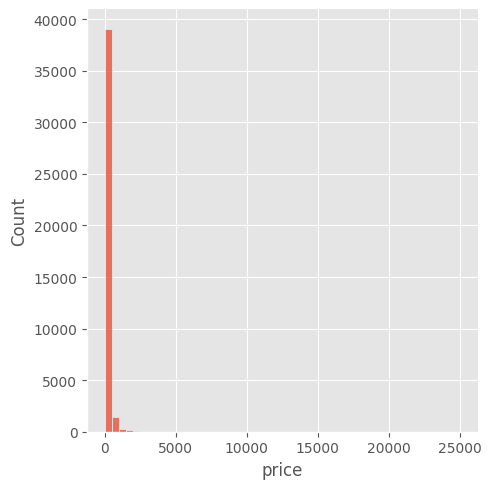

In [44]:
#Lets check the distribution of the price of the properties.
sns.displot(listings['price'], bins=50)

The distribution of price is heavily left skewed. Meaning the most of the properties price are between 0 - 5000 and some minority of the properties are having prices grator than that making the data to be skewed.

Also we saw that some properties have a price as 0 and that could not be possible here as no one will be giving their property on rent for free! That will be absurd.

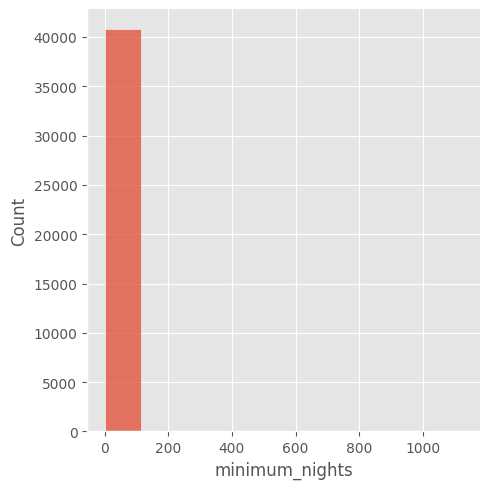

In [45]:
#minimum number of nights allowed by the host.
sns.displot(listings['minimum_nights'], bins=10)

The minimum nights goes from 1 to 400+. We come to know from the distribution that the data is skewed.

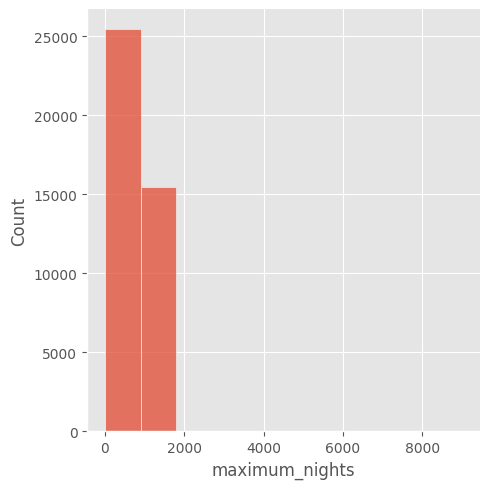

In [46]:
sns.displot(listings['maximum_nights'], bins=10)

Now let's check which top 5 properties have recieved the highest number of reviews.

In [47]:
highest_reviews = listings.sort_values(by='number_of_reviews', ascending=False)
print(highest_reviews.head().to_markdown())

|       |       id |   host_id | host_since          |   host_listings_count | property_type                     | room_type       | instant_bookable   |   minimum_nights |   maximum_nights |   number_of_reviews |   reviews_per_month |   price |   bedrooms |   beds | neighbourhood_cleansed   |   review_scores_rating | description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

The above table shows the top 5 properties which have recieved the highest number of reviews. Most of the properties are of Entire home/apt type and 3 of them are from city of London. 4 properties are instantly bookable. Out of the 5, two properties are by the same host: 333684904.

The top property which has recieved the most reviews is from the neighborhood of Westminster.

Let us look at these properties and try to come up with some hypothesis on why these properties have the highest reviews.

1- These properties are the most popular properties among the others and that is why they may be getting more bookings and hence more reviews.

2- The most properties are near the tourist attractions,nearer to the international airport and well connected transport hub. Maybe that's why the high amount of bookings.

3- All of them share the similar room type, i.e Private rooms/entire home. So we can assume that the privacy is important for customers.

4- They all offer minimum 1 night stay which most of the people prefer as it is very flexible.

5- The availability of the rooms is also high with 4 having an availability of approx 365+ days.


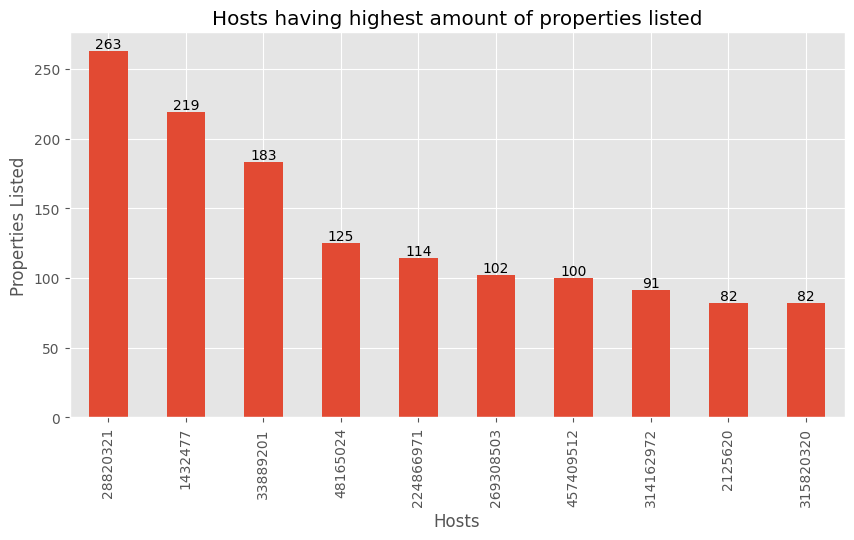

In [48]:
#host having highest amount of properties listed.
highest_props_host = listings['host_id'].value_counts().head(10)
highest_props_host.plot.bar(figsize=(10,5))
plt.xlabel('Hosts')
plt.ylabel('Properties Listed')
plt.title('Hosts having highest amount of properties listed')
for i, v in enumerate(highest_props_host):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [49]:
host_28820321 = listings[listings['host_id'] == 28820321]

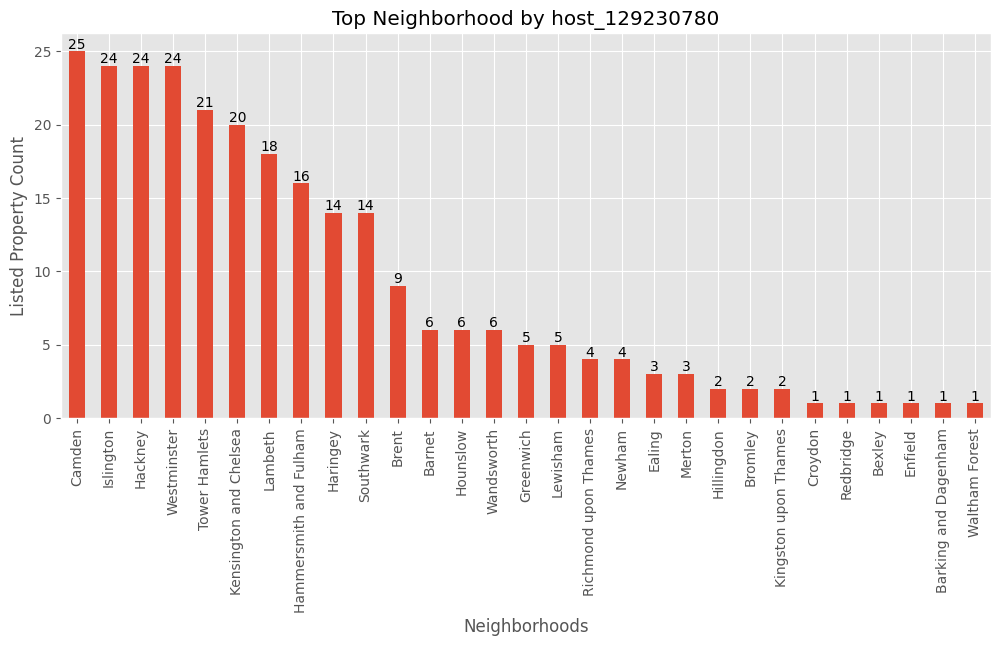

In [50]:
host_pop_neighbor = host_28820321['neighbourhood_cleansed'].value_counts()
plt.figure(figsize=(12,5))
host_pop_neighbor.plot.bar()
plt.xlabel('Neighborhoods')
plt.ylabel('Listed Property Count')
plt.title('Top Neighborhood by host_129230780')
for i, v in enumerate(host_pop_neighbor):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

Host with host_id: 28820321 has the most number of properties.
total = 586,
With most in Camden (25)
and least in Waltham Forest (1)

This host isn't in the top 5 highest number of reviews, this means that the number of properties listed on the Airbnb does not mean that the number of customers you will have will be more.

# **Which attributes have the biggest influence on price?**

In [51]:
numerics = ['host_listings_count', 'minimum_nights','maximum_nights', 'number_of_reviews', 'reviews_per_month', 'bedrooms','beds', 'review_scores_rating',]

numeric_df = listings[numerics + ['price']]

In [52]:
#Computing correlation
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

<Axes: title={'center': 'Attributes Correlation with Price'}>

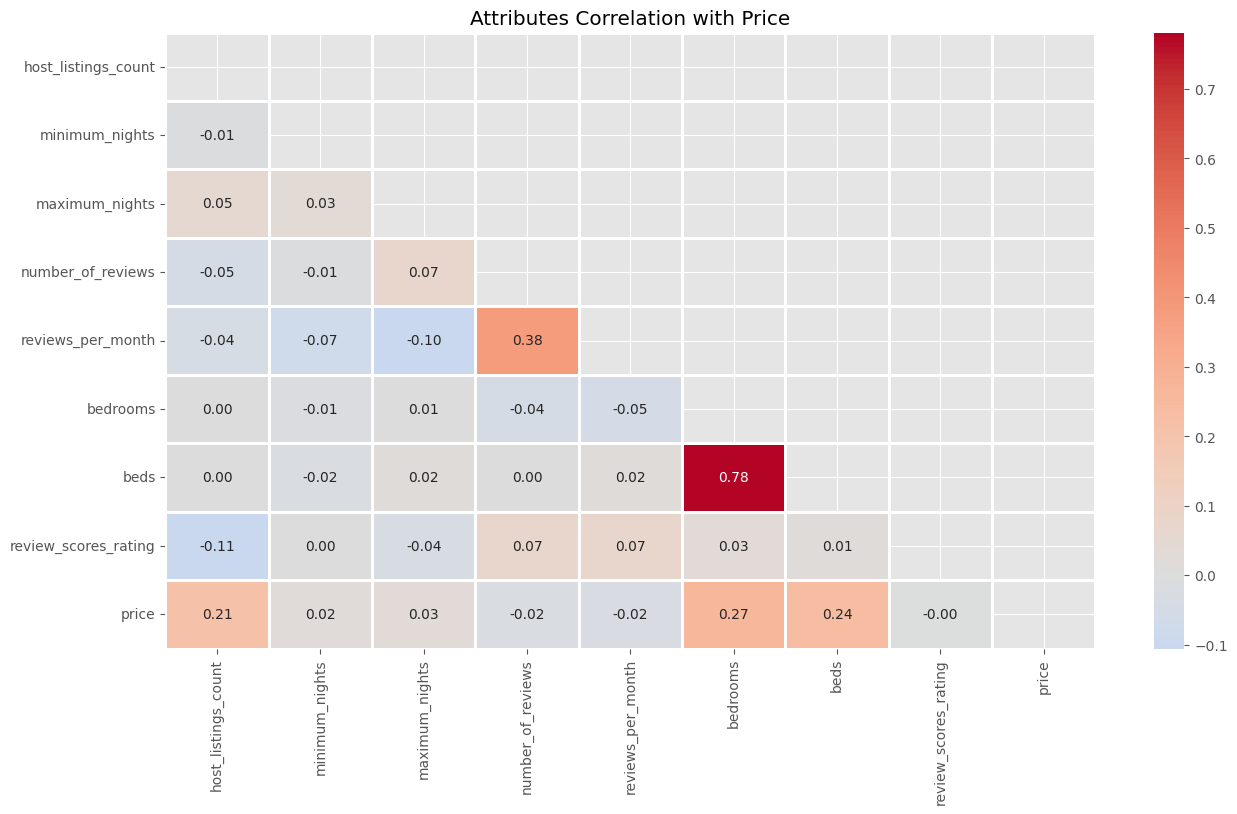

In [53]:
plt.figure(figsize=(15,8))
plt.title('Attributes Correlation with Price')
sns.heatmap(corr, mask = mask, center = 0, cmap='coolwarm', linewidths = 1, annot = True, fmt = '.2f')

From the above correlation matrix, we can observe that host_listings_count, bedrooms and beds have the highest influence on price.

# **Analyzing prices for the different room and property**

In [67]:
# Checking out the mean prices for the different room and property types
roomProperty = listings.groupby(['property_type','room_type'])['price'].mean()
roomProperty = roomProperty.reset_index()
roomProperty=roomProperty.sort_values('price',ascending=False)
roomProperty.head()

property_type        room_type       price
53                 Room in aparthotel     Private room  662.522727
22                       Entire villa  Entire home/apt  475.000000
5                              Castle  Entire home/apt  414.000000
29  Private room in bed and breakfast     Private room  405.971014
58                      Room in hotel       Hotel room  380.250000

<Axes: xlabel='room_type', ylabel='property_type'>

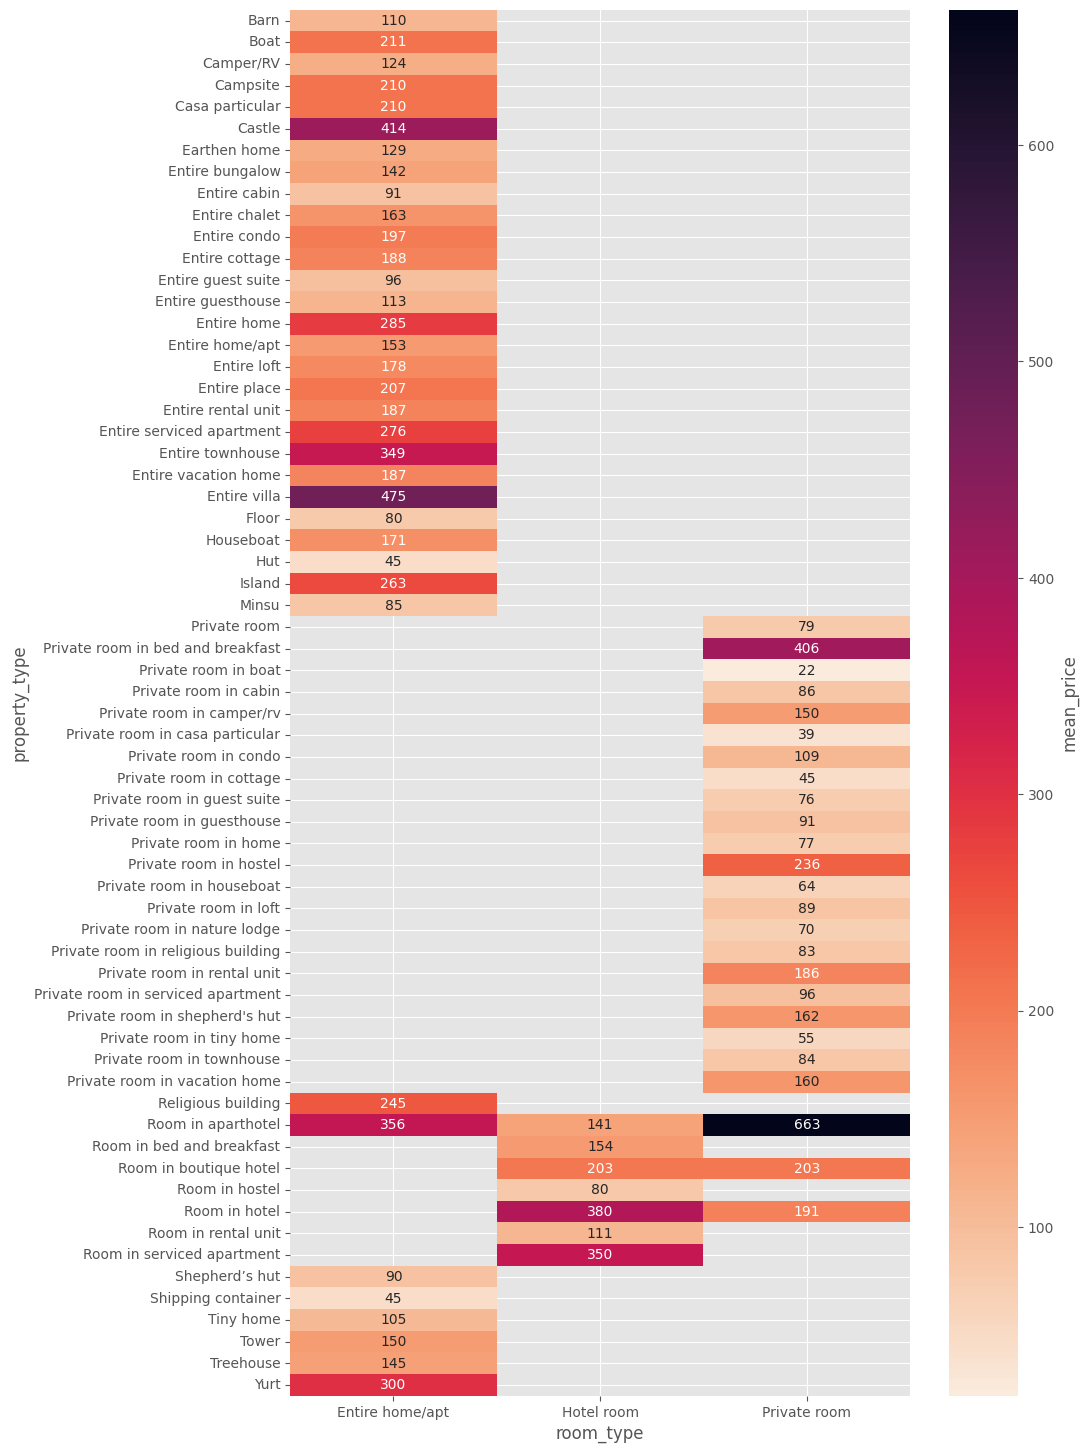

In [68]:
# Plotting a heatmap of the mean price for room type and a property type

plt.figure(figsize = (10,18))
sns.heatmap(listings.groupby(['property_type', 'room_type'])['price'].mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})


From the above heatmap, with lighter colour representing lower price and darker representing higher price, we can see that we have a mixed data.

Therefore, room_type alone doesn't play an important role in the final price, but together with property type it plays an important role


# **Analysing the listings based on the bedrooms**

<Axes: xlabel='bedrooms', ylabel='price'>

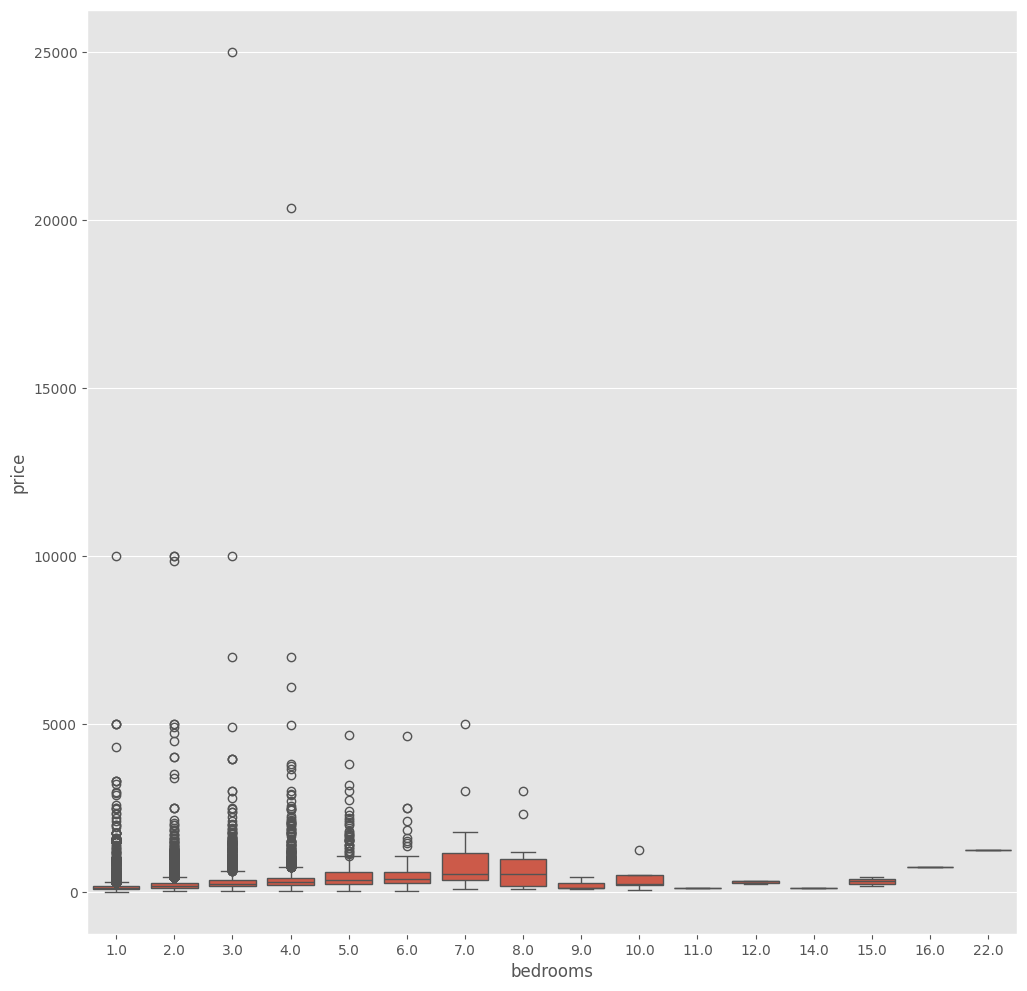

In [69]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sns.boxplot(x='bedrooms', y='price', data=listings[['bedrooms', 'price']])

The boxplots above show that indeed there is a slight trend between bedrooms and price. So, we should anaylse the no. bedrooms further with the property type.

In [71]:
# Creating a number of bedrooms vs property type dataframe
no_Room = listings[['property_type', 'bedrooms']]
no_Room.head()

property_type  bedrooms
1  Entire rental unit       2.0
3  Entire rental unit       1.0
5  Entire rental unit       3.0
6  Entire rental unit       2.0
7    Entire townhouse       1.0

<Axes: xlabel='bedrooms', ylabel='property_type'>

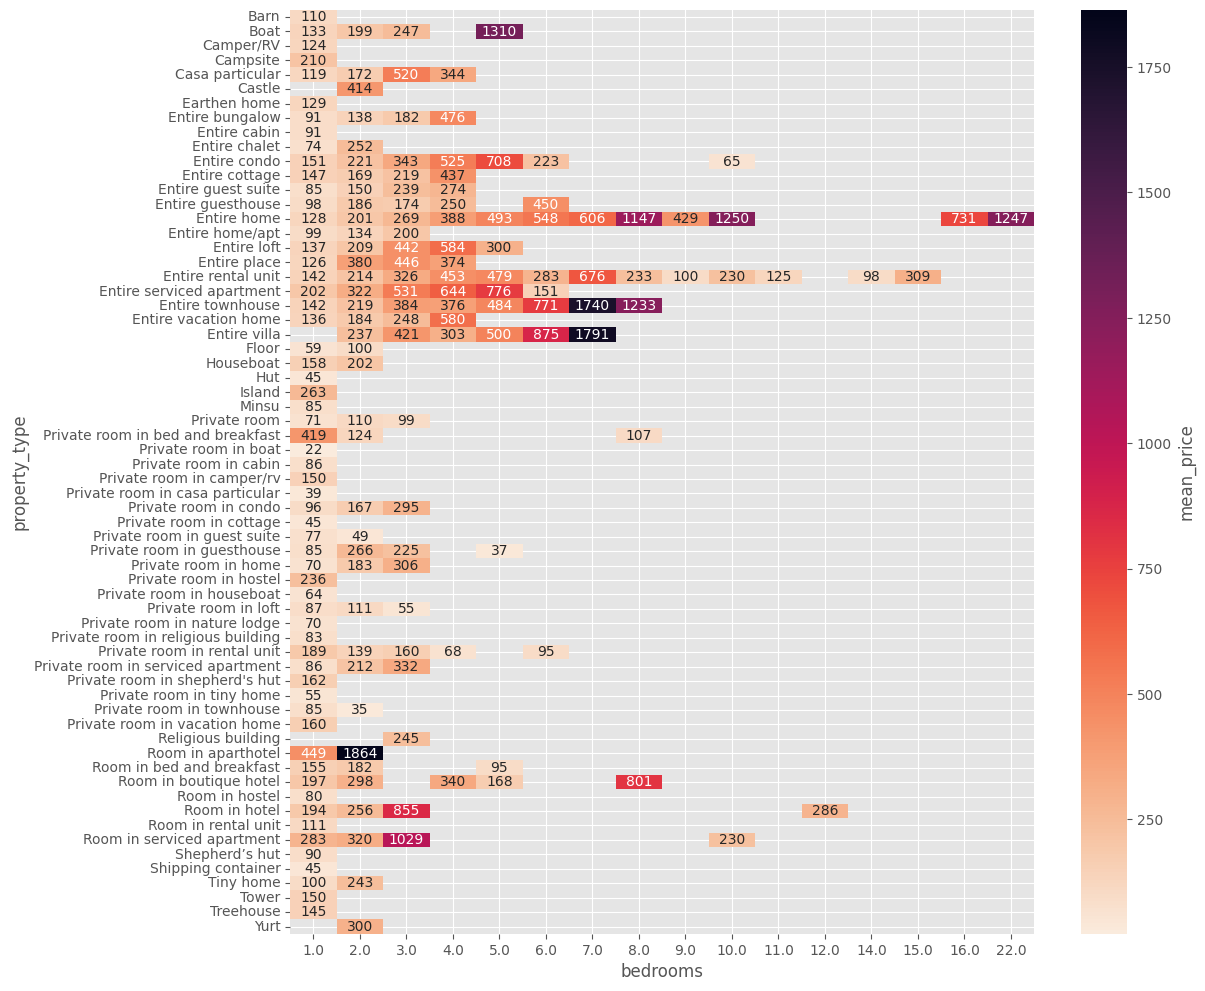

In [72]:
# Plotting a heatmap of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sns.heatmap(listings.groupby(['property_type', 'bedrooms'])['price'].mean().unstack(),annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})


From the above heatmap and boxplots, we can see that unsurprisingly, price of listings increases with number of bedrooms.

There are some listings that don't follow this trend. Like, an entire serviced apartment with 14 rooms or an entire condo with 10 rooms.

# **Does textual data in the description affect price?**

In [82]:
# Creating a dataframe of the descriptions of the 100 most expensive listings
descriptions_df = listings[['description','price']]
descriptions_df = descriptions_df[descriptions_df['description'].str.strip() != '']
descriptions_df = descriptions_df.sort_values('price',ascending=False)
top100 = descriptions_df.head(100)
top100.head()

description    price
54916  Have fun with the whole family at our stylish ...  25000.0
21204  The moment you walk through the door you will ...  20362.0
33531  Two bedroom flat with a living room with a dou...  10000.0
61383  The whole group will enjoy easy access to ever...  10000.0
45725  Modern,Spacious, well look after, <br />3 bedr...   9999.0

In [102]:
from nltk.corpus import stopwords
import string
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Some data cleaning

words=''
for index,row in top100.iterrows():
    words += row['description']
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ', 'br', '<', '>','/','b','/b']
nums=['0','1','2','3','4','5','6','7','8','9']
description_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in description_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['fun', 'whole', 'family', 'stylish', 'home', 'north', 'london', 'house', 'double', 'bedrooms', 'showers', 'toilets', 'garden.', 'house', 'perfectly', 'located', 'whestone', 'minutes', 'walk', 'underground', 'station', 'whice', 'easily', 'take', 'city', '25', 'minutes', 'also', 'minutes', 'walk', 'whetstone', 'high', 'street', 'amazing', 'restaurants.', "n't", 'need', 'bring', 'anything', 'except', 'clothes', 'even', 'baby', 'cot', 'lots', 'games', 'kids', 'enjoy', 'relax.', 'space', 'quiet', 'residential', 'space', 'next', 'north', 'london', 'high', 'street', 'off-street', 'parking', 'close', 'underground', 'station.', 'guest', 'access', 'access', 'whole', 'house', 'garden', 'apart', 'garage.', 'things', 'note', 'house', 'home', 'sole', 'access', 'stay.the', 'moment', 'walk', 'door', 'feel', 'home', 'immaculately', 'refurbished', 'original', '1920s', 'house', 'within', 'protected', 'area', 'moments', 'thames', 'access', 'beach', 'walk', 'ten', 'minutes', 'tower', 'bridge', 'nearby', '

'fun whole family stylish home north london house d'

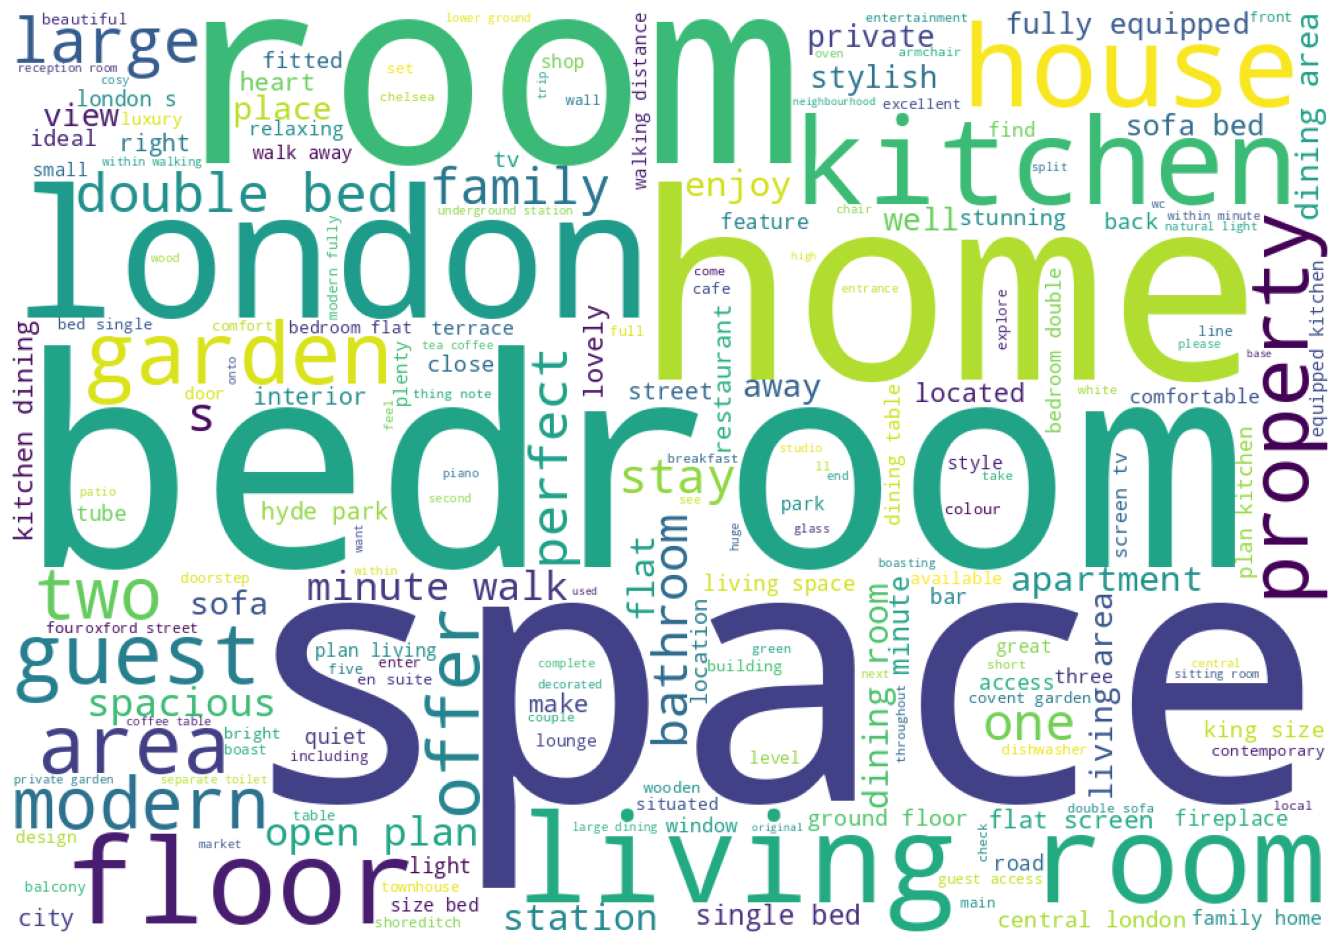

In [109]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the above wordcloud, we can see that the listings with the highest prices have descriptions such as 'London', Space', 'Bedroom', 'Family', 'Kitchen', 'Living Room', 'Luxury'. These ammenities will be further explored in depth in the machine learning parts of the project.

In [110]:
# Creating a dataframe of the descriptions of the 100 most cheapest listings
descriptions_low_df = descriptions_df.sort_values('price',ascending=True)
bot100 = descriptions_low_df.head(100)
bot100.head()

description  price
43049  Large room in a two-bedroom flat excellently l...    1.0
21113  THE Ideal Home for families and friends! You c...    8.0
31130  This is a studio apartment in East Acton/White...    8.0
23483  With an abundance of light and views, fancy ca...   10.0
10164  The listed property is generous in space and h...   10.0

In [111]:
# Some data cleaning

words=''
for index,row in bot100.iterrows():
    words += row['description']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ', 'br', '<', '>','/','b','/b']
nums=['0','1','2','3','4','5','6','7','8','9']
description_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in description_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'large room two-bedroom flat excellently located mi'

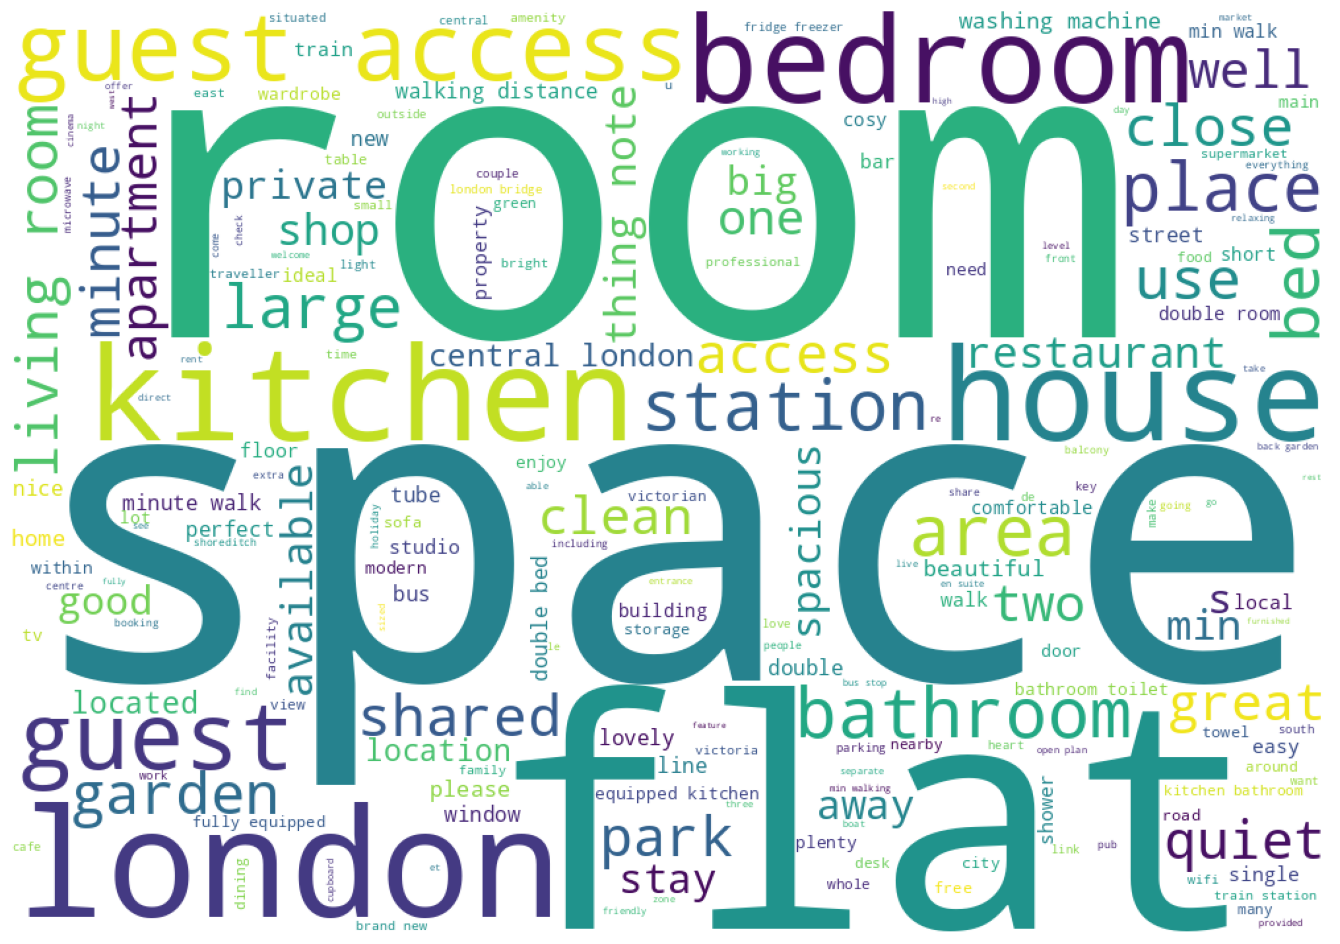

In [112]:
wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Here we have seen the most common words in the summary of the cheapest listings. As it can be seen from the wordcloud, indeed there are overlapping words with the most expensive listings. Words like: 'London', 'bedroom', 'Space' appear frequently in both. So they do not tell us anything special. However, words like: 'view', 'modern' & 'stylish' appear more frequently in expensive listings as opposed to cheaper listings. So it turns out that indeed there are certain words which appear more frequently among expensive listings.

# **Are you able to identify any trends or seasonality in the review data?**

In [124]:
#add a new column year_month using host_since column
listings['year_month'] = listings["host_since"].dt.strftime('%Y-%m')

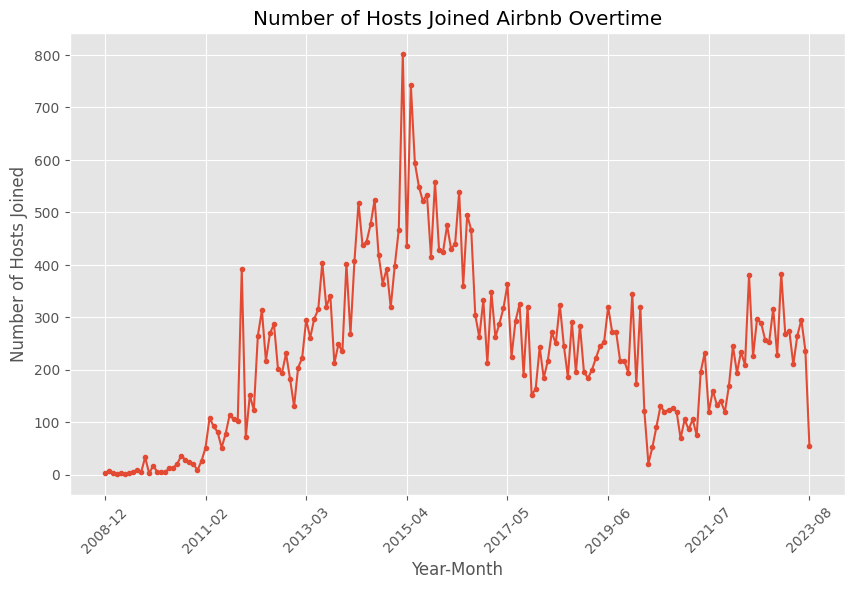

In [125]:
hosts_per_month = listings['year_month'].value_counts().sort_index()
#plot the trend of hosts joining
plt.figure(figsize = (10,6))
hosts_per_month.plot(kind = 'line', marker = '.')
plt.title('Number of Hosts Joined Airbnb Overtime')
plt.xlabel('Year-Month')
plt.ylabel('Number of Hosts Joined')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

From the above graph, we can observe that there is a huge increase in the hosts who joined Airbnb during the years 2015 and 2016. And suddenly there was a downward trend in the year 2017.

[Reason for the downward trend](https://www.cnbc.com/2017/04/13/airbnb-growth-slowing-regulation-ubs.html)

# **Analyzing neighbourhood with price of listing**

<Axes: xlabel='property_type', ylabel='neighbourhood_cleansed'>

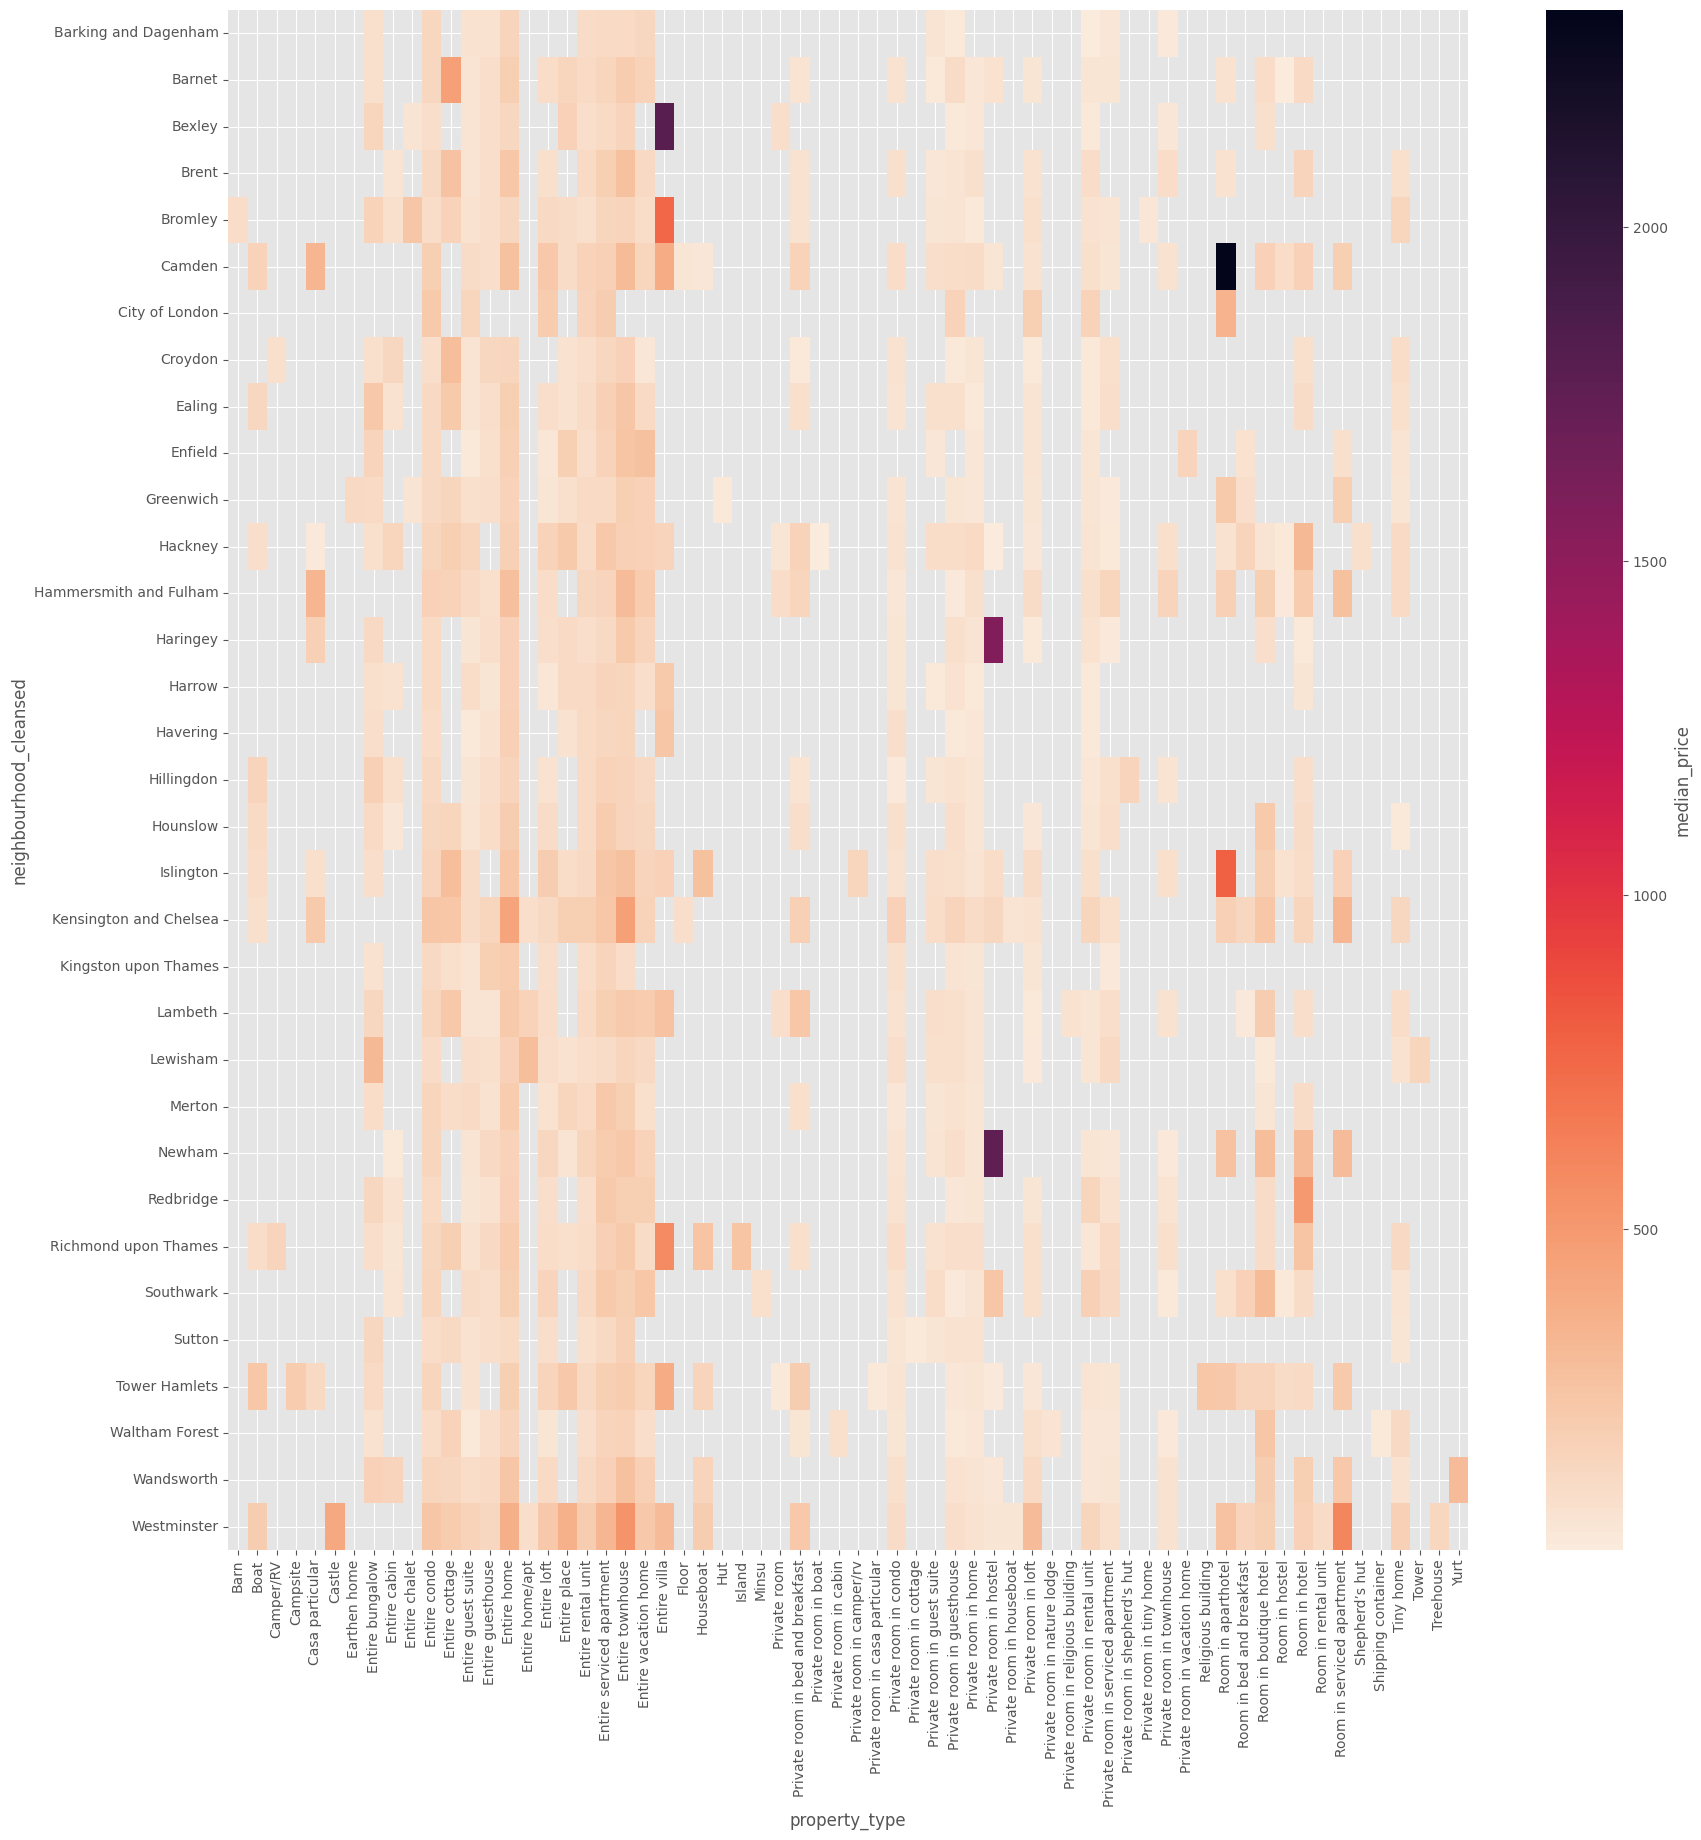

In [126]:
# Plotting a heatmap of the neighbourhoods vs property type with the median price

plt.figure(figsize=(20,20))
sns.heatmap(listings.groupby(['neighbourhood_cleansed', 'property_type']).price.median().unstack(),annot=False, fmt=".2f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'median_price'})

From the heatmap, above we can infer that neighborhood doesn't have much influence on price.

# **Analyzing if review sentiment has any relation with price?**

In [127]:
reviews = pd.read_csv("https://storage.googleapis.com/public-data-337819/reviews%202%20reduced.csv",low_memory=False)

In [128]:
print(reviews.head().to_markdown())

|    |   listing_id |                 id | date       |   reviewer_id | reviewer_name   | comments                                                                                                                                                                                                                                                                                                     |
|---:|-------------:|-------------------:|:-----------|--------------:|:----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 |        13913 | 597622110054753727 | 2022-04-04 |       2941217 | Kévin           | If the room is available, just take it !                                                                                    

In [129]:
reviews = reviews.dropna()

In [130]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722332 entries, 0 to 722419
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     722332 non-null  int64 
 1   id             722332 non-null  int64 
 2   date           722332 non-null  object
 3   reviewer_id    722332 non-null  int64 
 4   reviewer_name  722332 non-null  object
 5   comments       722332 non-null  object
dtypes: int64(3), object(3)
memory usage: 38.6+ MB


In [131]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


sid = SentimentIntensityAnalyzer()

reviews['polarity_value'] = "Default"
reviews['neg'] = 0.0
reviews['pos'] = 0.0
reviews['neu'] = 0.0
reviews['compound'] = 0.0

for index, row in reviews.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviews.at[index, 'polarity_value'] = ss
    reviews.at[index, 'neg'] = ss['neg']
    reviews.at[index, 'pos'] = ss['pos']
    reviews.at[index, 'neu'] = ss['neu']
    reviews.at[index, 'compound'] = ss['compound']

print(reviews.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


   listing_id                  id        date  reviewer_id reviewer_name  \
0       13913  597622110054753727  2022-04-04      2941217         Kévin   
1       13913  628812668788849576  2022-05-17     32486646        Saarah   
2       13913  631032182017371215  2022-05-20    203803703        Mallin   
3       13913  632423370762131190  2022-05-22    172968198           Ged   
4       13913  646234379625287966  2022-06-10     27083732        Robert   

                                            comments  \
0           If the room is available, just take it !   
1  Alina's flat is lovely and quirky, with art al...   
2  This is the most cosy and beautifully-decorate...   
3  Alina was very welcoming, friendly  and helpfu...   
4  An arty flat, clean and comfortable big room, ...   

                                      polarity_value  neg    pos    neu  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.0  0.000  1.000   
1  {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...  0.

In [132]:
import re

def is_english(comment):
  """Checks if a comment likely contains English text using regular expressions."""
  english_pattern = r"[A-Z][a-z]+\s+|\w+\?\s+|\w+\.\s+"
  return bool(re.search(english_pattern, comment))  # Returns True if a match is found

EngReviewsDF = reviews[reviews['comments'].apply(is_english)]

In [133]:
EngReviewsDF.head(2)

listing_id                  id        date  reviewer_id reviewer_name  \
0       13913  597622110054753727  2022-04-04      2941217         Kévin   
1       13913  628812668788849576  2022-05-17     32486646        Saarah   

                                            comments  \
0           If the room is available, just take it !   
1  Alina's flat is lovely and quirky, with art al...   

                                      polarity_value  neg    pos    neu  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.0  0.000  1.000   
1  {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...  0.0  0.406  0.594   

   compound  
0    0.0000  
1    0.9805

##### Number of comments with positive sentiment

In [157]:
polarDF=EngReviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',',''))
    polarDF.at[i,'Sentiment'] = 'positive'
del polarDF['range_i']
polarDF.head()

count_of_Comments  RANGE Sentiment
0              32136    0.0  positive
1              79416    0.1  positive
2             128651    0.2  positive
3             136209    0.3  positive
4              98611    0.4  positive

##### Number of comments with negative sentiment

In [158]:
polarDFneg=EngReviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',',''))
    polarDFneg.at[i,'Sentiment'] = 'negative'
del polarDFneg['range_i']
polarDF = pd.concat([polarDF, polarDFneg], ignore_index=True)

polarDFneg.head()

count_of_Comments  RANGE Sentiment
0              96376    0.0  negative
1              23521    0.1  negative
2               7098    0.2  negative
3               2574    0.3  negative
4                837    0.4  negative

##### Number of comments with neutral sentiment

In [159]:
polarDFnut=EngReviewsDF[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',',''))
    polarDFnut.at[i,'Sentiment'] = 'neutral'
del polarDFnut['range_i']

polarDF = pd.concat([polarDF, polarDFnut], ignore_index=True)


polarDFnut.head()

count_of_Comments  RANGE Sentiment
0                221    0.0   neutral
1               8463    0.1   neutral
2              21860    0.2   neutral
3              34058    0.3   neutral
4              62633    0.4   neutral

<Figure size 1000x1000 with 0 Axes>

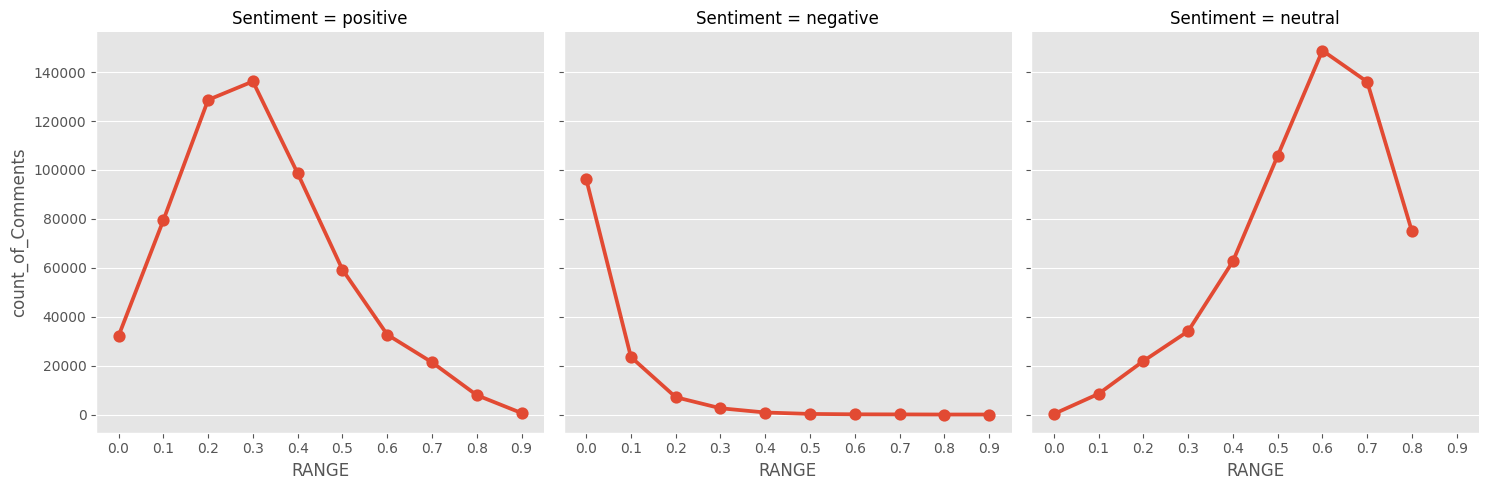

In [160]:
# Visualizing the sentiment counts
plt.figure(figsize=(10,10))
sns.catplot(data=polarDF, x="RANGE", y="count_of_Comments", col="Sentiment", kind="point")
plt.show()


From the graphs above, we can conlcude 3 things. First is that **most reviews do not have much negativity. Only a few reviews have a modicum of negativity**. Infact, most of the reviews have no negativity classified in the 0.0 negative sentiment. Second thing we can see is that there are **a lot of reviews with a reasonable amount of positivity**. However, the final thing we can conclude is that **most of the reviews have much neutrality**. **If most of the reviews have a lot of neutrality, we cannot infer much on positivity/negativity of comments with respect to price since the bulk of reviews all fall in the neutral category**. So we can conclude that most reviews are written with a neutral sentiment although there is a very slight tilt to positive sentiments.

# **Let's perform Machine Learning!**

In [18]:
!pip install catboost

In [19]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
listings_df = listings[['property_type','room_type', 'number_of_reviews','price', 'bedrooms']]

In [92]:
print(listings_df.shape)
listings_df.info()

(40898, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 40898 entries, 1 to 87733
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_type      40898 non-null  object 
 1   room_type          40898 non-null  object 
 2   number_of_reviews  40898 non-null  int64  
 3   price              40898 non-null  float64
 4   bedrooms           40898 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ MB


Let's clean property type

To clean the data in this variable:
- Grouping property types whose low counts might be insignificant and not provide us with enough information
- Thus, grouping property types that have counts that are < 100

In [93]:
listings_df['property_type'].value_counts().head(30)

property_type
Entire rental unit                    22886
Entire condo                           7126
Entire home                            5276
Entire serviced apartment              1482
Entire townhouse                        982
Private room in rental unit             409
Room in hotel                           329
Entire loft                             305
Private room in home                    240
Private room in guesthouse              226
Room in boutique hotel                  199
Entire guesthouse                       152
Entire guest suite                      134
Private room in loft                    132
Private room in condo                   114
Private room in serviced apartment      112
Room in aparthotel                       90
Entire vacation home                     88
Private room in bed and breakfast        69
Room in serviced apartment               68
Entire bungalow                          49
Entire cottage                           49
Boat              

In [94]:
listings_df.loc[~listings_df['property_type'].isin(['Entire rental unit', 'Entire condo', 'Entire home', 'Entire serviced apartment', 'Entire townhouse', 'Private room in rental unit', 'Room in hotel',
 'Entire loft', 'Private room in home', 'Private room in guesthouse', 'Room in boutique hotel', 'Entire guesthouse', 'Entire guest suite', 'Private room in loft',
 'Private room in condo', 'Private room in serviced apartment']), 'property_type'] = 'other'

listings_df['property_type'].value_counts()

property_type
Entire rental unit                    22886
Entire condo                           7126
Entire home                            5276
Entire serviced apartment              1482
Entire townhouse                        982
other                                   794
Private room in rental unit             409
Room in hotel                           329
Entire loft                             305
Private room in home                    240
Private room in guesthouse              226
Room in boutique hotel                  199
Entire guesthouse                       152
Entire guest suite                      134
Private room in loft                    132
Private room in condo                   114
Private room in serviced apartment      112
Name: count, dtype: int64

In [106]:
dummies_df = pd.get_dummies(listings_df, drop_first = True)
dummies_df = dummies_df[['bedrooms','number_of_reviews','price']]
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40898 entries, 1 to 87733
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           40898 non-null  float64
 1   number_of_reviews  40898 non-null  int64  
 2   price              40898 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.2 MB


In [107]:
# Separating features and target

X = dummies_df.drop('price', axis = 1)
y = dummies_df['price']

In [108]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [109]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: Linear Regression


In [110]:
# Creating and fitting the model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [111]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train_scaled)
testPredictionLR = linreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [112]:
# Checking Accuracy corresponding to Predictors
train_MSE_LR = round(mean_squared_error(y_train,trainPredictionLR),3)
test_MSE_LR = round(mean_squared_error(y_test,testPredictionLR),3)
train_R2_LR = round(r2_score(y_train,trainPredictionLR),3)
test_R2_LR = round(r2_score(y_test,testPredictionLR),3)
print(train_MSE_LR)
print(test_MSE_LR)
print(train_R2_LR)
print(test_R2_LR)



86221.877
873183.336
0.069
-0.019


### Model 2: Random Forest Regression


In [113]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train_scaled,y_train)

# Predicting the training and testing sets
trainPrediction_RF = RF.predict(X_train_scaled)
testPrediction_RF =RF.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [114]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

Weight
number_of_reviews  0.281206
bedrooms           0.718794

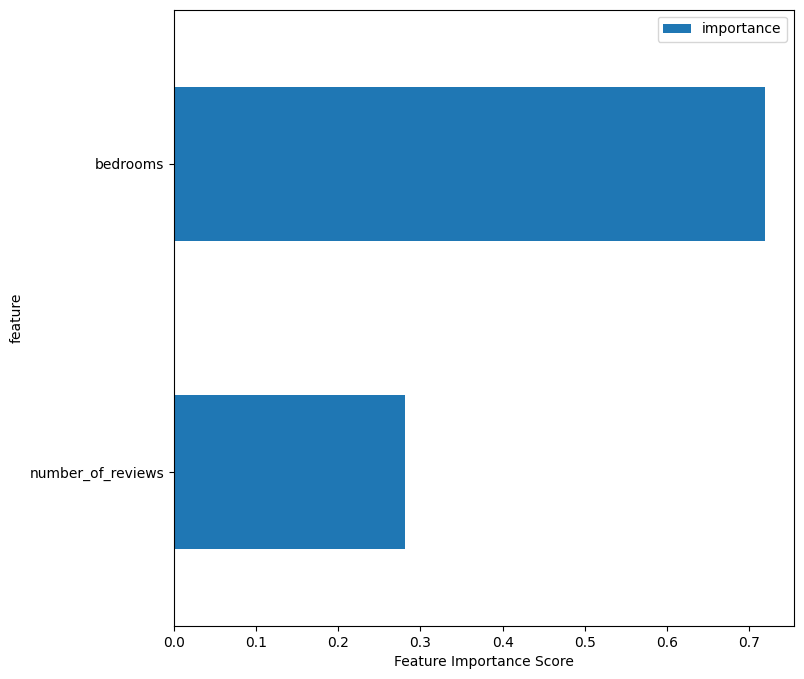

In [115]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

In [116]:
# Checking Accuracy corresponding to Predictors
train_MSE_RF = round(mean_squared_error(y_train,trainPrediction_RF),3)
test_MSE_RF = round(mean_squared_error(y_test,testPrediction_RF),3)
train_R2_RF = round(r2_score(y_train,trainPrediction_RF),3)
test_R2_RF = round(r2_score(y_test,testPrediction_RF),3)
print(train_MSE_RF)
print(test_MSE_RF)
print(train_R2_RF)
print(test_R2_RF)



82425.036
887972.495
0.11
-0.036


### Model 3 : XGBoost


In [117]:
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train_scaled,y_train)

# Predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

In [118]:
# Checking Accuracy corresponding to Predictors
train_MSE_XGB = round(mean_squared_error(y_train,trainPredictin_xgb_reg),3)
test_MSE_XGB = round(mean_squared_error(y_test,testPredictin_xgb_reg),3)
train_R2_XGB = round(r2_score(y_train,trainPredictin_xgb_reg),3)
test_R2_XGB = round(r2_score(y_test,testPredictin_xgb_reg),3)
print(train_MSE_XGB)
print(test_MSE_XGB)
print(train_R2_XGB)
print(test_R2_XGB)



91956.054
858704.983
0.007
-0.002


### Model 4: CatBoost


In [119]:
# Creating and fitting the model
CatB=CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1,loss_function='RMSE')
CatB.fit(X_train_scaled, y_train,plot=True);

# Predicting based on the model
trainPrediction_CatB = CatB.predict(X_train)
testPrediction_CatB = CatB.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 302.1518275	total: 4.17ms	remaining: 8.33s
1:	learn: 300.5417003	total: 7.25ms	remaining: 7.25s
2:	learn: 299.1268950	total: 10.1ms	remaining: 6.72s
3:	learn: 297.9315502	total: 13ms	remaining: 6.5s
4:	learn: 297.0681385	total: 16.2ms	remaining: 6.46s
5:	learn: 296.3777978	total: 18.9ms	remaining: 6.29s
6:	learn: 295.7945399	total: 21.8ms	remaining: 6.19s
7:	learn: 295.2292797	total: 24.6ms	remaining: 6.12s
8:	learn: 294.7706479	total: 27.5ms	remaining: 6.08s
9:	learn: 294.4068117	total: 32.7ms	remaining: 6.51s
10:	learn: 294.0528901	total: 36ms	remaining: 6.51s
11:	learn: 293.7962199	total: 39ms	remaining: 6.46s
12:	learn: 293.6033378	total: 41.7ms	remaining: 6.37s
13:	learn: 293.4104276	total: 44.4ms	remaining: 6.3s
14:	learn: 293.2548531	total: 47.2ms	remaining: 6.25s
15:	learn: 293.1036148	total: 50ms	remaining: 6.2s
16:	learn: 293.0023069	total: 52.6ms	remaining: 6.13s
17:	learn: 292.8926645	total: 55.6ms	remaining: 6.12s
18:	learn: 292.8012130	total: 58.6ms	remaining: 6

In [120]:
# Checking Accuracy corresponding to Predictors
train_MSE_CAT = round(mean_squared_error(y_train,trainPrediction_CatB),3)
test_MSE_CAT = round(mean_squared_error(y_test,testPrediction_CatB),3)
train_R2_CAT = round(r2_score(y_train,trainPrediction_CatB),3)
test_R2_CAT= round(r2_score(y_test,testPrediction_CatB),3)
print(train_MSE_CAT)
print(test_MSE_CAT)
print(train_R2_CAT)
print(test_R2_CAT)



137433.786
898371.187
-0.485
-0.048
